# Dog weight regression #

Welcome to this assignment. In this asignment you will try to predict the weight of a dog.<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/generated_dogs.csv'
'''
The dataset consists of 10000 dogs who died of old age. It is generated using meta data from dogs.

'''
df = pd.read_csv(url)
df.head()

,Breed,Gender,Age_time_of_death,Height,Weight,Likes,Skills
0,Border Collie,Male,13.3,20.70,40.50,likes_people_better_than_dogs,high_trainability
1,Basset Hound,Male,12.7,13.65,51.02,likes_dogs_better_than_people,no_special_skills
2,Dachshund,Female,14.0,8.59,24.58,likes_dogs_better_than_people,barks_like_hell
3,Boston Terrier,Male,12.3,16.27,20.13,likes_people_better_than_dogs,no_special_skills
4,Chihuahua,Male,15.3,7.14,5.92,likes_dogs_better_than_people,barks_like_hell


# First step #


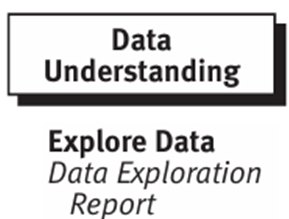


I will help you a little bit. We could try a pairplot.

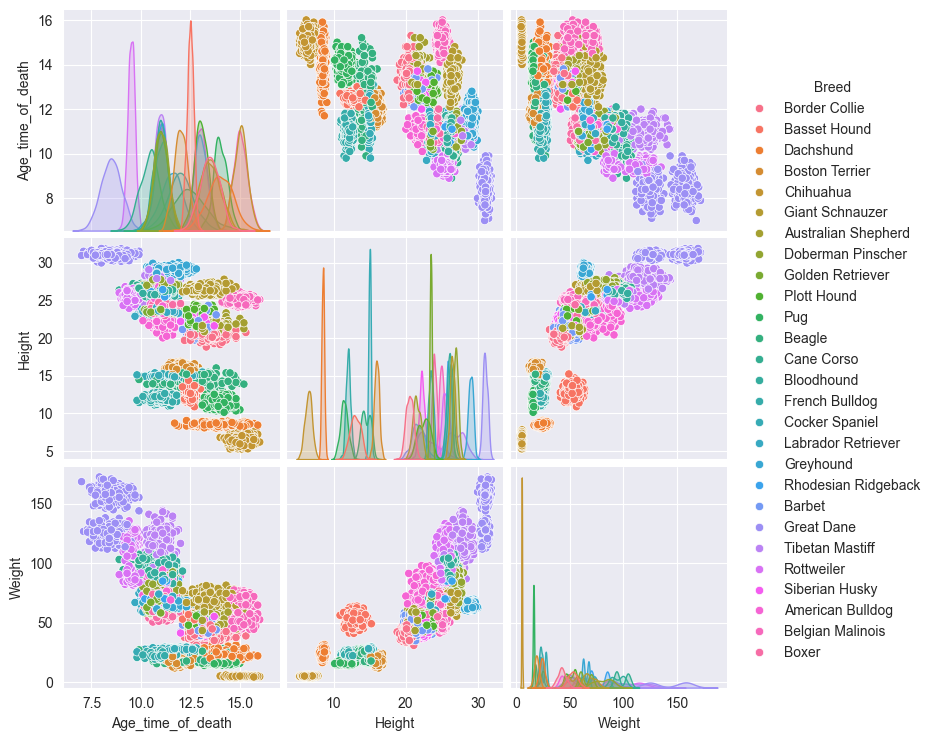

In [3]:
sns.pairplot(df.drop(['Gender','Skills','Likes'],axis=1), hue='Breed')

1) Try different visualisations

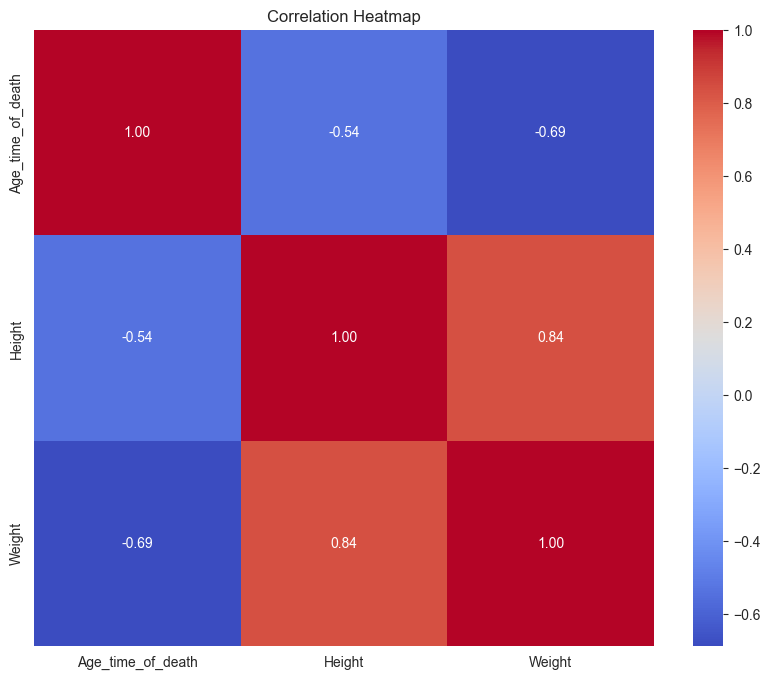

In [4]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Second step #

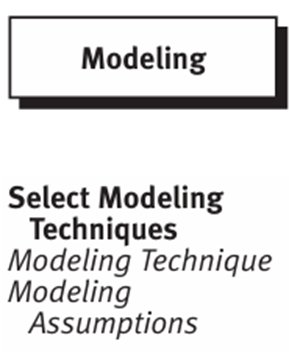

1) Select different models

1. Linear Regression
2. Polynomial Regression
3. Ridge Regression
4. Decision Tree Regression
5. Random Forest Regression

# Third step #

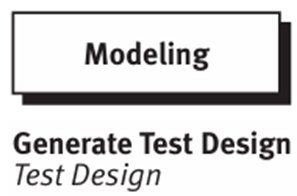

1) Drop columns or not, use _get_dummies or not, etc.<br>
2) Split your dataset in training, validation, and test.

In [5]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

# dummies of breeds
df = pd.get_dummies(df, columns=['Breed'], drop_first=True)

# dummies of Gender
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# dummies of Skills
df = pd.get_dummies(df, columns=['Skills'], drop_first=True)

# dummies of Likes
df = pd.get_dummies(df, columns=['Likes'], drop_first=True)

In [6]:
# split dataset
from sklearn.model_selection import train_test_split
X = df.drop('Weight', axis=1)
y = df['Weight']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[ 0.58146375,  0.9346157 , -0.20068244, ..., -0.39698717,
        -0.19836002, -0.65331791],
       [ 1.49085342,  0.52529038, -0.20068244, ..., -0.39698717,
        -0.19836002, -0.65331791],
       [-0.75230776,  1.0056684 , -0.20068244, ..., -0.39698717,
        -0.19836002, -0.65331791],
       ...,
       [ 0.94521962,  0.16539303, -0.20068244, ...,  2.51897312,
        -0.19836002, -0.65331791],
       [ 1.85460929, -2.27356803, -0.20068244, ..., -0.39698717,
        -0.19836002, -0.65331791],
       [-0.6310558 ,  0.83112591, -0.20068244, ..., -0.39698717,
        -0.19836002,  1.53064837]], shape=(7000, 34))

# Fourth step #

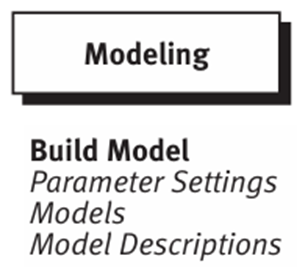

1) Apply your models.

In [9]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# hyperparameter tuning for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)
best_degree = grid_search.best_params_['poly_features__degree']
print(f"Best degree for polynomial regression: {best_degree}")

# polynomial regression
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y_train)

Best degree for polynomial regression: 2


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
# hyperparameter tuning for Ridge regression
from sklearn.linear_model import Ridge

param_grid_ridge = {
    'alpha': np.linspace(0, 10, 1001)
}
ridge_model = Ridge()
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_val, y_val)
best_alpha = grid_search_ridge.best_params_['alpha']
print(f"Best alpha for Ridge regression: {best_alpha}")

# Ridge regression
ridge_reg_model = Ridge(alpha=1.0)
ridge_reg_model.fit(X_train, y_train)

Best alpha for Ridge regression: 0.5700000000000001


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [38]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [39]:
# Random Forest regression
from sklearn.ensemble import RandomForestRegressor
forest_reg_model = RandomForestRegressor(n_estimators=100)
forest_reg_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Fifth step #
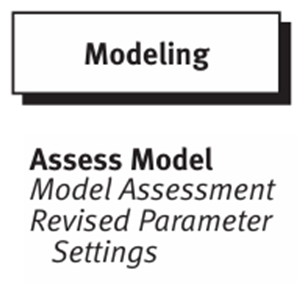

1) Assess your models.

In [41]:
# asses linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def assess_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

In [42]:
assess_model(y_test, lin_reg_model.predict(X_test))

Mean Absolute Error: 4.457403125294871
Mean Squared Error: 34.67576566823813
R^2 Score: 0.968184312047076


Hyperparameter tuning did not improve the linear regression model.<br>
The degree 2 polynomial regression model performed better.<br>

In [50]:
assess_model(y_test, poly_reg_model.predict(poly_features.transform(X_test)))

Mean Absolute Error: 2.3684851474434767
Mean Squared Error: 11.973161419376254
R^2 Score: 0.9890143920346715


Ridge regressions, MSE without hyperparameter tuning: 34.68672824190068<br>
with hyperparameter tuning: 34.68672824190068<br>

In [58]:
assess_model(y_test, ridge_reg_model.predict(X_test))

Mean Absolute Error: 4.457707819046574
Mean Squared Error: 34.68672824190068
R^2 Score: 0.96817425367299


In [45]:
assess_model(y_test, tree_reg_model.predict(X_test))

Mean Absolute Error: 3.4320166666666663
Mean Squared Error: 26.956580420370372
R^2 Score: 0.9752668143181629


In [46]:
assess_model(y_test, forest_reg_model.predict(X_test))

Mean Absolute Error: 2.7166487157936485
Mean Squared Error: 16.456001645500887
R^2 Score: 0.9849012991287566


# And repeat!!!! #
1) Go back to 1st, 2nd or 3rd step and improve your results!

